In [1]:
#%pip install openpyxl
#%pip install plotnine

import pandas as pd
import plotnine as p9
from plotnine import *
import numpy as np

In [2]:
file_location = '../../qss20_finalproj_rawdata/summerwork/raw/Adverse_Parties_FW_TRLA.xlsx'

intake = pd.read_excel(file_location)

print(intake.shape)
intake.head()

(11247, 31)


,CaseID/Lead Case #,Case #,Case Disposition,Intake Date,Date Opened,Date Closed,Date of Rejection,Legal Problem Code,County of Dispute,Adverse Party Name,...,Lead Case AP Organization,Lead Case AP Business Name,Lead Case AP Street Address,Lead Case AP Apt#/Suite#,Lead Case AP Street Address 2,Lead Case AP City,Lead Case AP State,Lead Case AP Zip Code,Lead Case AP County,AP Lead Relationship Type
0,20-1037239,20-1037305,Pending,2020-09-09,NaN,NaN,NaN,FARMWORKER: AWPA/FLSA/Breach,NaN,"Bernard, Charles",...,"Crawfish Processing, LLC","Crawfish Processing, LLC",155 S PRESTON ST,NaN,NaN,Marksville,LA,71351.0,NaN,Employer
1,20-1037239,20-1050511,Open,2020-11-03,2021-03-04,NaN,NaN,FARMWORKER:OTHER,Out of State,NaN,...,"Crawfish Processing, LLC","Crawfish Processing, LLC",155 S PRESTON ST,NaN,NaN,Marksville,LA,71351.0,NaN,Employer
2,20-1037239,60-12006,Open,2020-04-13,2020-04-13,NaN,NaN,FARMWORKER: AWPA/FLSA/Breach,Avoyelles,NaN,...,"Crawfish Processing, LLC","Crawfish Processing, LLC",155 S PRESTON ST,NaN,NaN,Marksville,LA,71351.0,NaN,Employer
3,20-1037239,60-12006,Open,2020-04-13,2020-04-13,NaN,NaN,FARMWORKER: AWPA/FLSA/Breach,Avoyelles,"Bernard, Charles",...,"Crawfish Processing, LLC","Crawfish Processing, LLC",155 S PRESTON ST,NaN,NaN,Marksville,LA,71351.0,NaN,Employer
4,20-1037239,60-12008,Open,2020-05-18,2020-05-18,NaN,NaN,FARMWORKER: AWPA/FLSA/Breach,Avoyelles,"Bernard, Charles",...,"Crawfish Processing, LLC","Crawfish Processing, LLC",155 S PRESTON ST,NaN,NaN,Marksville,LA,71351.0,NaN,Employer


In [3]:
print(intake['CaseID/Lead Case #'].count())
print(intake['Case #'].count())

7282
11247


In [4]:
intake['Intake Date'] = pd.to_datetime(intake['Intake Date'])
intake['Date Opened'] = pd.to_datetime(intake['Date Opened'])
intake['Date Closed'] = pd.to_datetime(intake['Date Closed'])
intake['Date of Rejection'] = pd.to_datetime(intake['Date of Rejection'])

In [15]:
legal_problem_counts = intake['Legal Problem Code'].value_counts(dropna = False).to_frame().reset_index()
legal_problem_counts = legal_problem_counts.rename(columns = {'index':'Legal Problem Code', 
                                                              'Legal Problem Code': 'Count'})
legal_problem_counts['h2a'] = np.where(legal_problem_counts['Legal Problem Code'].str.contains('H-2A') |
                                       legal_problem_counts['Legal Problem Code'].str.contains('H2A'), 1, None)

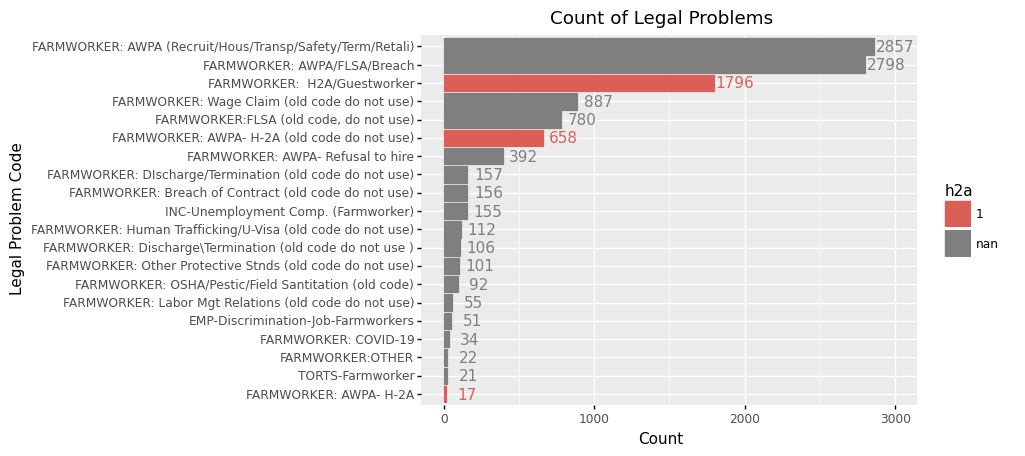

<ggplot: (310939775)>

In [16]:
ggplot(legal_problem_counts, aes(x = 'Legal Problem Code', y = 'Count', fill = 'h2a', color = 'h2a')) + \
    geom_bar(stat = 'identity') + \
    geom_text(aes(label = 'Count'), nudge_y = 140) + \
    scale_x_discrete(limits = legal_problem_counts['Legal Problem Code'][::-1]) + \
    coord_flip() + \
    labs(title = 'Count of Legal Problems')

In [7]:
intake['intake_ym'] = intake['Intake Date'].astype('datetime64[M]')
intake.intake_ym


0       2020-09-01
1       2020-11-01
2       2020-04-01
3       2020-04-01
4       2020-05-01
           ...    
11242   2021-06-01
11243   2019-11-01
11244   2020-03-01
11245   2018-01-01
11246   2021-05-01
Name: intake_ym, Length: 11247, dtype: datetime64[ns]

/usr/local/lib/python3.8/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_bin : Removed 39 rows containing non-finite values.


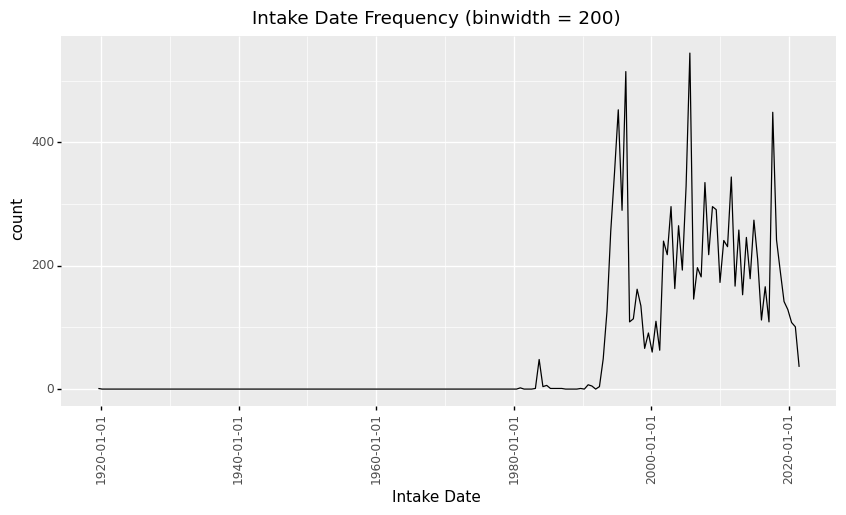

<ggplot: (286385083)>

In [8]:
p9.options.figure_size = (10, 4.8)

ggplot(intake, aes('Intake Date')) + \
    geom_freqpoly(binwidth = 200) + \
    theme(axis_text_x = element_text(angle = 90)) + \
    labs(title = 'Intake Date Frequency (binwidth = 200)')

In [9]:
state_counts = intake['AP State'].value_counts(dropna = False).to_frame().reset_index()
state_counts = state_counts.rename(columns = {'index': 'AP State', 'AP State': 'Count'})
state_counts["trla_catchment"] = np.where(state_counts['AP State'].isin(['TX', 'MS', 'LA', 'KY', 'AL', 'TN']), 1, None)

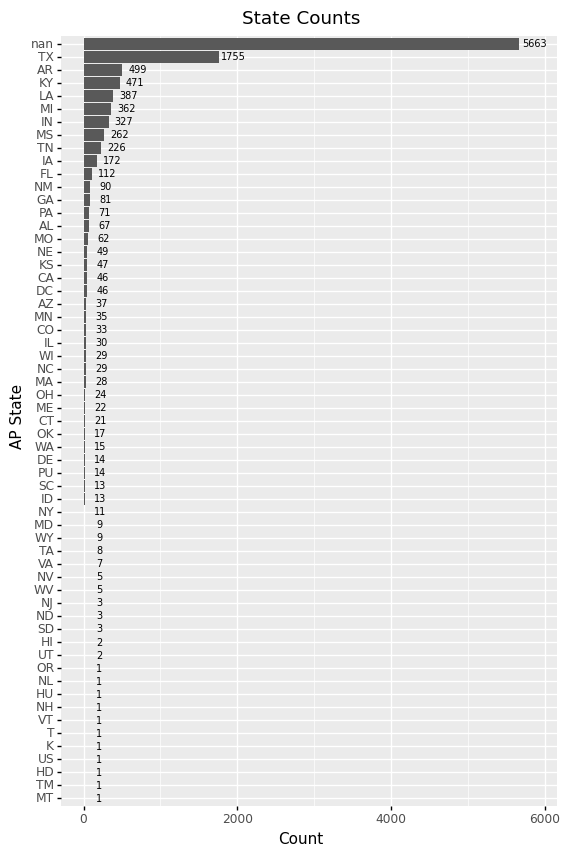

<ggplot: (310629407)>

In [10]:
p9.options.figure_size = (6.4, 10)

ggplot(state_counts, aes(x = 'AP State', y = 'Count')) + \
    geom_bar(stat = 'identity') + \
    geom_text(aes(label = 'Count'), nudge_y = 200, size = 7) + \
    scale_x_discrete(limits = state_counts['AP State'][::-1]) + \
    coord_flip() + \
    labs(title = 'State Counts')

In [11]:
p9.options.figure_size = (6.4, 4.8)

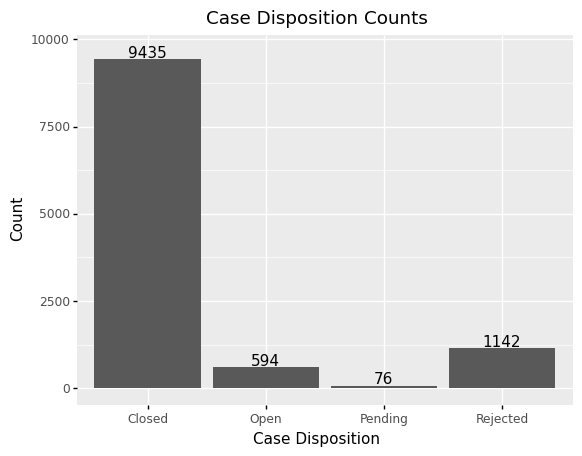

<ggplot: (310852069)>

In [12]:
dispo_counts = intake['Case Disposition'].value_counts(dropna = False).to_frame().reset_index()
dispo_counts = dispo_counts.rename(columns = {'index': 'Case Disposition', 'Case Disposition': 'Count'})

ggplot(dispo_counts, aes(x = 'Case Disposition', y = 'Count')) + \
    geom_bar(stat = 'identity') + \
    geom_text(aes(label = 'Count'), nudge_y = 200) + \
    labs(title = 'Case Disposition Counts')

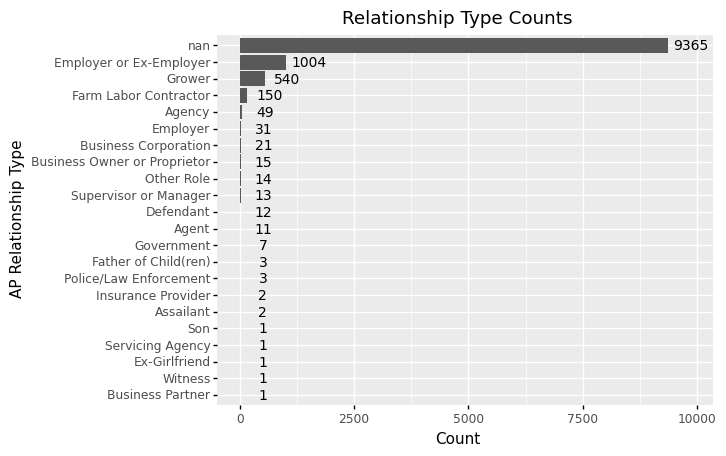

<ggplot: (310883301)>

In [13]:
relat_counts = intake['AP Relationship Type'].value_counts(dropna = False).to_frame().reset_index()
relat_counts = relat_counts.rename(columns = {'index': 'AP Relationship Type', 'AP Relationship Type': 'Count'})

ggplot(relat_counts, aes(x = 'AP Relationship Type', y = 'Count')) + \
    geom_bar(stat = 'identity') + \
    geom_text(aes(label = 'Count'), nudge_y = 500, size = 10) + \
    scale_x_discrete(limits = relat_counts['AP Relationship Type'][::-1]) + \
    coord_flip() + \
    labs(title = 'Relationship Type Counts')

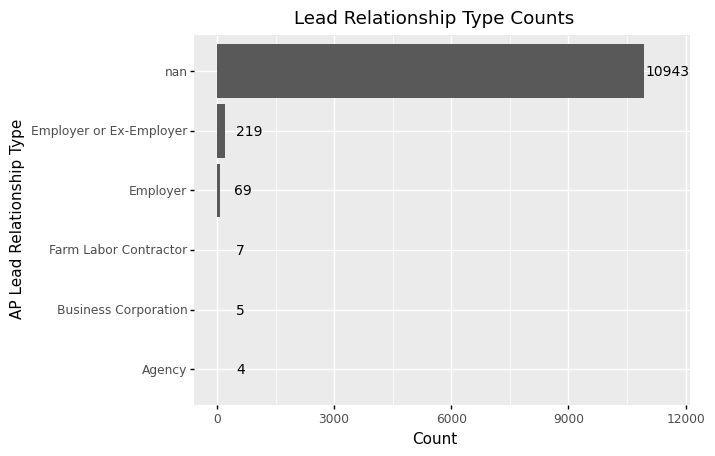

<ggplot: (310942458)>

In [14]:
lead_relat_counts = intake['AP Lead Relationship Type'].value_counts(dropna = False).to_frame().reset_index()
lead_relat_counts = lead_relat_counts.rename(columns = {'index': 'AP Lead Relationship Type', 
                                                        'AP Lead Relationship Type': 'Count'})

ggplot(lead_relat_counts, aes(x = 'AP Lead Relationship Type', y = 'Count')) + \
    geom_bar(stat = 'identity') + \
    geom_text(aes(label = 'Count'), nudge_y = 600, size = 10) + \
    scale_x_discrete(limits = lead_relat_counts['AP Lead Relationship Type'][::-1]) + \
    coord_flip() + \
    labs(title = 'Lead Relationship Type Counts')